<div style="max-width:66ch;">

# Lecture notes - overfitting and underfitting

This is the lecture note for **overfitting and underfitting**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to overfitting and underfitting. I encourage you to read further about overfitting and underfitting. </p>

Read more:

- [Overfitting wikipedia](https://en.wikipedia.org/wiki/Overfitting)
- [Underfitting vs overfitting sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
- [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)
- [PolynomialFeatures sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [6.3.7 Generating polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)
- [Bias-variance tradeoff towards datascience](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
- [Bias-variance tradeoff wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

</div>


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

<div style="max-width:66ch;">

## Simulate data

Simulate from a 2nd order polynomial with Gaussian noise i.e. 

$$y = a_0 + a_1x + a_2x^2 + \epsilon ,$$ 
where $\epsilon \sim \mathcal{N(0,1)}$

</div>

<Axes: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}>

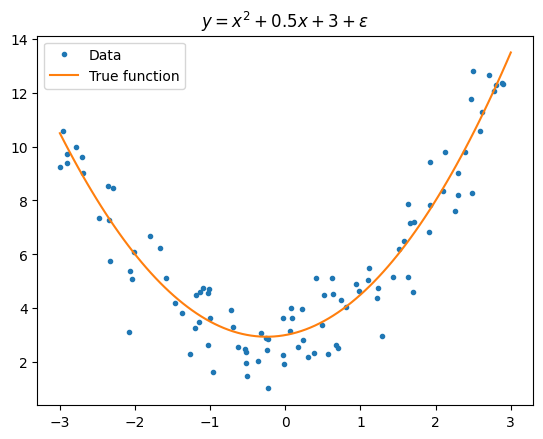

In [2]:
samples = 100
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + .5*x + 3 
y = f(X)+np.random.randn(samples,1)

def draw_data():
    fig = plt.figure(dpi = 100)
    ax = plt.axes()
    ax.plot(X,y, '.', label="Data")

    x = np.linspace(-3,3, samples)
    ax.plot(x, f(x), label = "True function")

    ax.set(title=r"$y = x^2 + 0.5x + 3 + \epsilon$")
    ax.legend()

    return ax

draw_data()

<div style="max-width:66ch;">


## Polynomial regression

Polynomial regression fits a polynomial of order $n$ to model the relationship between features and the label. 

It is linear in terms of the unknown parameters. In fact polynomial regression is a special case of multiple linear regression.

Using ```sklearn.preprocessing.PolynomialFeatures``` we can feature engineer new features that previously didn't exist. It creates a feature matrix that represent polynomial combinations. 

For example $X = (X_1, X_2)$ would be transformed to ($1, X_1, X_2, X_1^2, X_2^2, X_1X_2, X_2^2)$ using degree 2, if bias is included, if bias is excluded 1 disappears.

</div>

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures creates feature matrix to represent the polynomial combinations
poly = PolynomialFeatures(degree = 2, include_bias=False)

# here it is okay to use fit_transform as PolynomialFeatures uses the 
# dimensions of data when computing the new matrix 
poly_features = poly.fit_transform(X)
poly_features[:4]


array([[ 2.58352625e+00,  6.67460789e+00],
       [-3.71918282e-02,  1.38323209e-03],
       [ 1.63650984e+00,  2.67816447e+00],
       [ 1.51109282e+00,  2.28340151e+00]])

<div style="max-width:66ch;">

### Train on transformed dataset

We train on the transformed dataset using linear regression, which basically is multiple linear regression on transformed dataset. Since the data has polynomial features now, we have polynomial regression. As we have chosen 2 degrees, we model a second degree polynomial. 

Training or fit in sklearn API means estimating the unknown parameters based on data. 

</div>

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(poly_features, y)

# estimated parameters
model.coef_

array([[0.52430392, 1.01150107]])

In [5]:
# bias term
model.intercept_

array([2.84111273])

<div style="max-width:66ch;">

### Visualizing model and true data

Note that in reality true model wouldn't exist, or at least we wouldn't have it. If we did have the true model, there would be no reason to do machine learning, just use the model for prediction. For simulation however, we have the true model, so we can visualize to see how our model performs qualitatively. Also note that when dimensions are higher than 3, we can't visualize the data. 

</div>

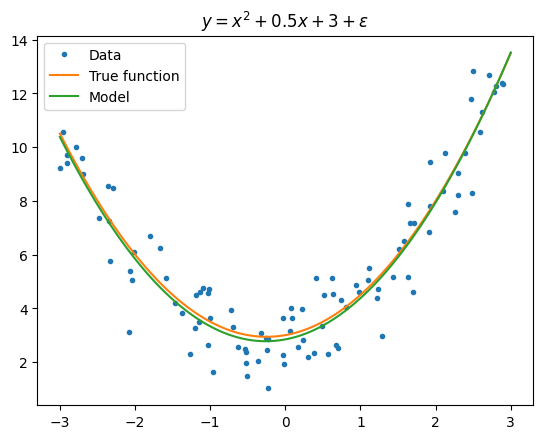

In [6]:
x = np.linspace(-3,3, samples)
x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend();

<div style="max-width:66ch;">

## Underfitting

Underfitting is when a model is too simple (low variance) to represent the data accurately. For example the data has second degree shape and a line is used to model it. 

</div>

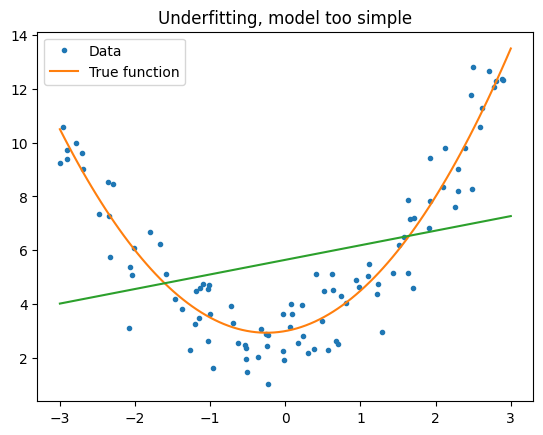

In [7]:
model = LinearRegression()
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple");

<div style="max-width:66ch;">

## Overfitting

Model too complicated, and fitted too much to the data. Complicated model (high variance) risk to fit to noise in training data, which make them generalize worse. Overfitting usually occurs when there is too small traning set, and/or it is not representative for testing data.


</div>

(100, 30)


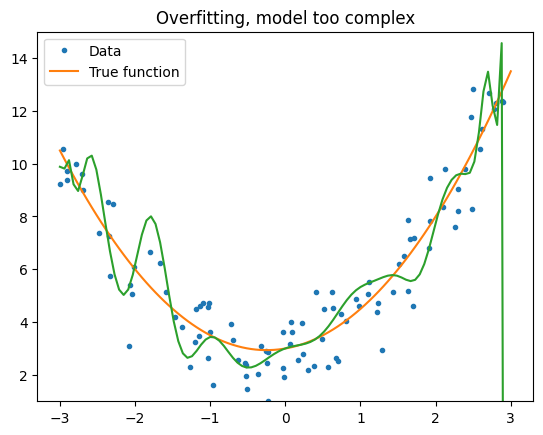

In [8]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

x_poly_features = poly_model_30.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15]);

# The model captures more points in training data but can't generalize to test data 

<div style="max-width:66ch;">

## Choose a model

When choosing a model, we want to find a good middle ground. Note that we are not always able to plot the data and its corresponding graphs as our data might be high dimensional. In order to choose correct model we can use a cost/loss function to keep track of the error for different models (different degrees of polynomial). 

</div>

In [9]:
from sklearn.model_selection import train_test_split

# we increase number of simulated samples 
samples = 10000
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**4 + x**2 + .5*x + 3 # change model to 3rd degree polynomial
y = f(X)+np.random.randn(samples,1)

print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (10000, 1), y.shape: (10000, 1)


<div style="max-width:66ch;">

### Train|Validation|Test split

We split our data set into 
- training set
- validation set
- testing set

Reason for this split is to use the validation data for choosing the degree of the polynomial (a hyperparameter)

</div>

In [10]:
# use train_test_split twice to obtain train|val|test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6700, 1), (6700, 1), (1650, 1), (1650, 1), (1650, 1), (1650, 1))

<div style="max-width:66ch;">

### Train model and predict on validation

We use validation data to choose a model i.e. which degree to use, then we'll test on the testing data, so we don't have any data leakage to our evaluation. 

</div>

In [11]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False) # bias False as LinearRegression has intercept by default
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_lin_reg = LinearRegression()

    model_lin_reg.fit(train_features, y_train)

    y_pred_val = model_lin_reg.predict(val_features)
    
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

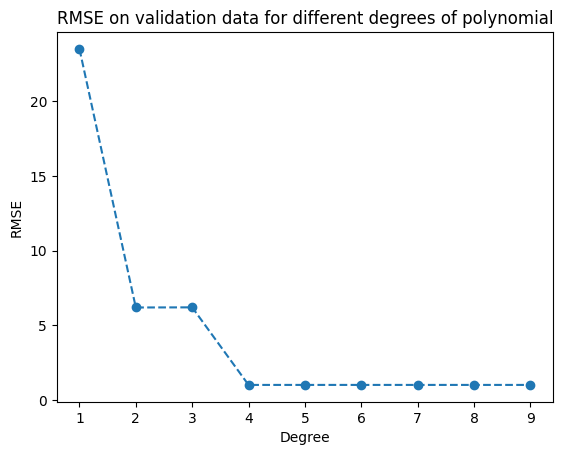

In [12]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), RMSE_val[:9],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "RMSE", title = "RMSE on validation data for different degrees of polynomial");
# we see that from degreen 3 the error is low, and it doesn't change much when going higher degrees
# hence we would choose degree 3 here, which corresponds to our simulated polynomial degree. 
# this type of plot is called elbow plot.
# now we could move on to train the model using degree 3 and then predict on testing data

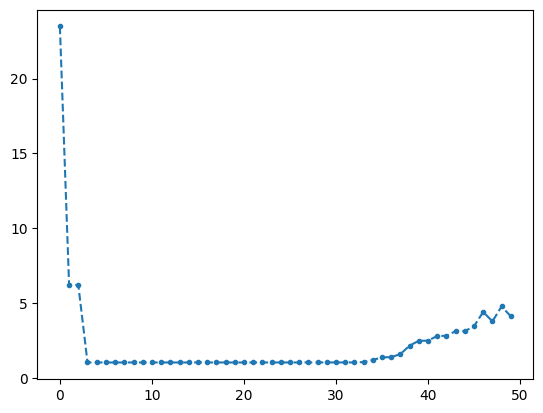

In [13]:
ax = plt.axes()

# try much higher degree polynomials and see that error actually increases 
# note that this might happen much faster for real data 

ax.plot(range(50), RMSE_val[:50],'--.', label = "Validation");

<div style="max-width:66ch;">

## Bias-Variance Trade-off

A models generalization error is bias + variance + irreducible error

- bias - difference between average prediction and correct value. 
    - high bias, pay little attention to data, 
    - oversimplifies and underfits.
- variance - spread of our data
    - many degrees of freedom  -> high variance -> overfit to data
- irreducible error - due to noise of data, only way to decrease this is to clean the data itself.

Higher model complexity -> higher variance, lower bias

Lower model complexity -> lower variance, higher bias

The goal is to choose a model that is complex enough not to underfit, but not too complex to overfit. Need to find a balance between bias and variance. evaluation. 

</div>

<div style="max-width:66ch;">

## Summary

In this lecture we've covered the concepts of underfitting and overfitting, which are extremely important concepts within machine learning. When modelling, we need to find a balance between complexity and simplicity of models in order to get good generalization. 

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
